# Fixed point iteration

Let's convert the roots of a quadratic polynomial $f(x)$ to a fixed point problem.

In [3]:
f = x -> x^2 - 4*x + 3.5
using Polynomials
@show r = roots(Polynomial([3.5,-4,1]));

r = roots(Polynomial([3.5, -4, 1])) = [1.2928932188134525, 2.7071067811865475]


We'll define $g(x)=x-f(x)$. Intersections of its graph with the line $y=x$ are fixed points of $g$ and thus roots of $f$. (Only one is shown in the chosen plot range.)

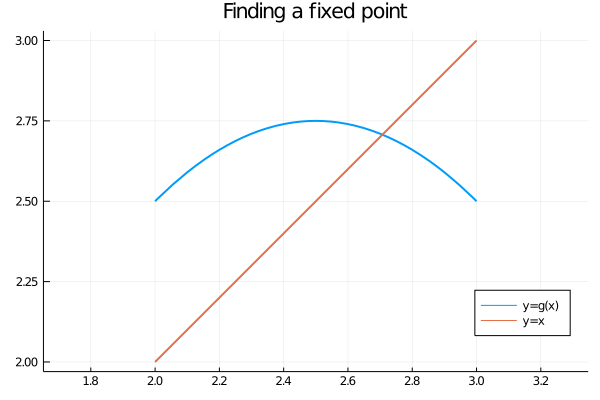

In [10]:
g = x -> x - f(x)
using Plots
plt = plot([g x->x],2,3,l=2,label=["\$y=g(x)\$" "\$y=x\$"],aspect_ratio=1,
    title="Finding a fixed point",legend=:bottomright)

If we evalaute $g(2.1)$, we get a value of almost 2.6.

In [11]:
x = 2.1;  y = g(x)

2.5900000000000003

So $g(x)$ is considerably closer to a fixed point than $x$ was. The value $y=g(x)$ ought to become our new $x$ value! Changing the $x$ coordinate in this way is the same as following a horizontal line over to the graph of $y=x$.

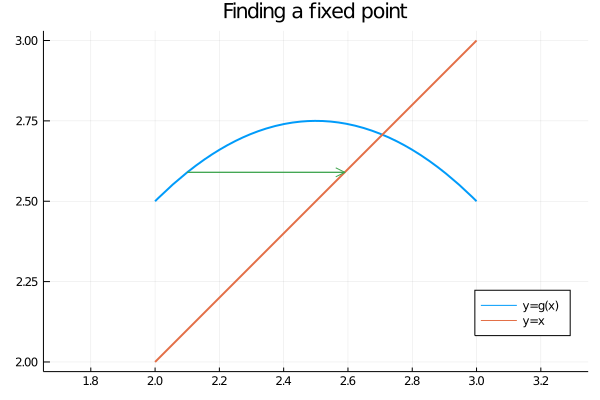

In [12]:
plot!([x,y],[y,y],label="",arrow=true)

Now we can compute a new value for $y$. We leave $x$ alone here, so we travel along a vertical line to the graph of $g$.

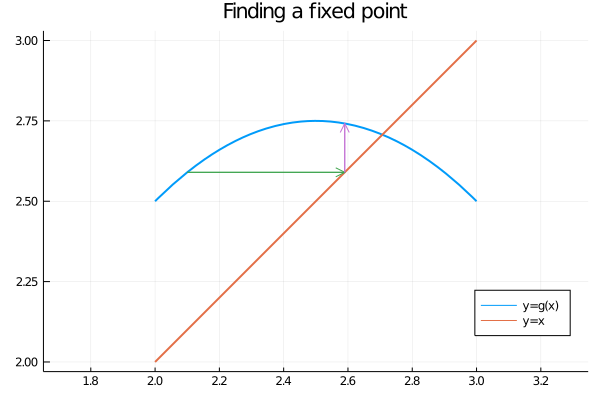

In [13]:
x = y;  y = g(x)
plot!([x,x],[x,y],label="",arrow=true)

You see that we are in a position to repeat these steps as often as we like. Let's apply them a few times and see the result.

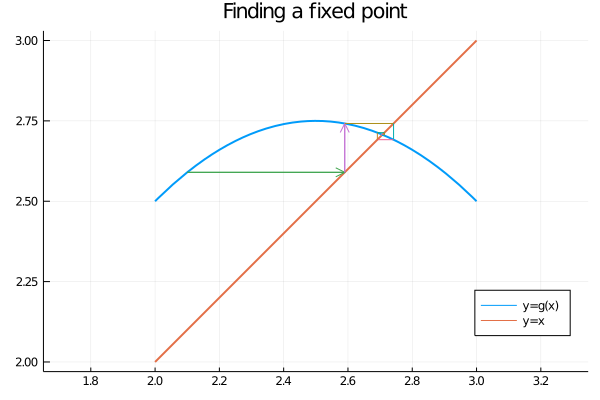

In [14]:
for k = 1:5
    plot!([x,y],[y,y],label="");  x = y;    # y --> new x
    y = g(x);  plot!([x,x],[x,y],label="")  # g(x) --> new y
end
display(plt)

The process spirals in beautifully toward the fixed point we seek. Our last estimate has almost 4 accurate digits.

In [16]:
rmax = maximum(r)
abs(y-rmax)/rmax

0.0001653094344995643

Now let's try to find the other fixed point $\approx 1.29$ in the same way. We'll use 1.3 as a starting approximation.

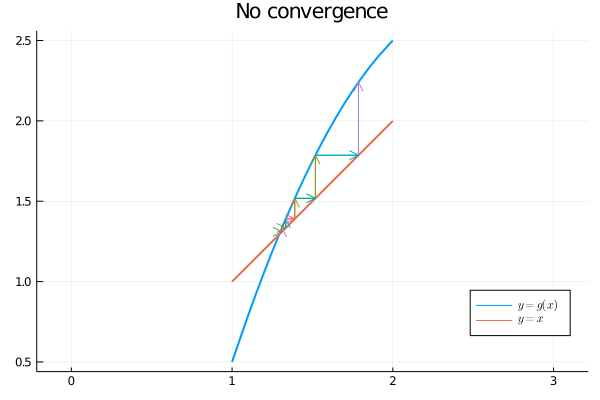

In [17]:
plt = plot([g x->x],1,2,l=2,label=["\$y=g(x)\$" "\$y=x\$"],aspect_ratio=1,
    title="No convergence",legend=:bottomright)
x = 1.3; y = g(x);
for k = 1:5
    plot!([x,y],[y,y],label="",arrow=true);  x = y;    # y --> new x
    y = g(x);  plot!([x,x],[x,y],label="",arrow=true)  # g(x) --> new y
end
display(plt)

This time, the iteration is pushing us _away_ from the correct answer.